Load Titanic dataset which is available in seaborn and answer the questions.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
titanic.shape

(891, 15)

In [10]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
titanic.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

There are NaNs in age, embarked, deck and embark_town. Do remember to handle them when using those columns.

#### 1. Plot the age distribution of passangers using distplot(). Use dropna to drop rows with NaN values in column age.

In [11]:
filtered_df = titanic[titanic['age'].notnull()]

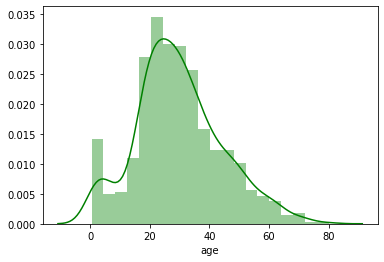

In [17]:
sns.distplot(filtered_df['age'],hist = True,color="g")

#### 2. Create an lmplot of age and fare. Use plt.ylim(0, 300) to exclude outliers

In [22]:
# 
filtered_df = filtered_df.dropna()

(0, 300)

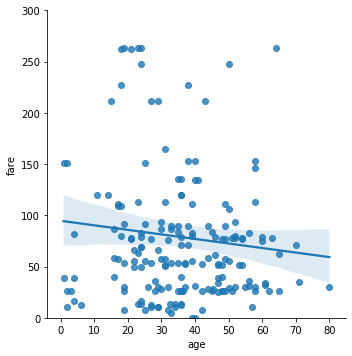

In [31]:
sns.lmplot('age','fare',filtered_df)
plt.ylim(0,300)
# filtered_df.info()

#### 3. Add two more parameters, pclass and survived to the plot created in Qn 2. 

(0, 300)

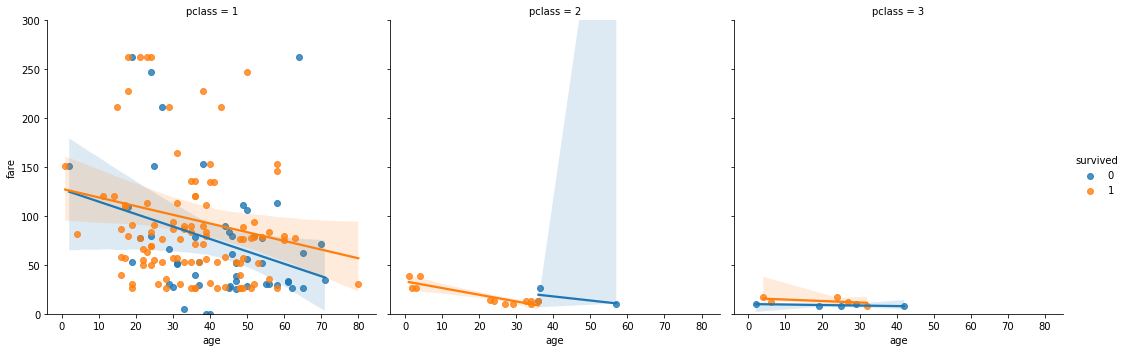

In [35]:
sns.lmplot('age','fare',filtered_df,hue='survived',col = 'pclass')
plt.ylim(0,300)

#### 4. Visualize the distribution of three classes using countplot. How many first, second and third class passengers were on board. Use sex column as additional parameter using hue.

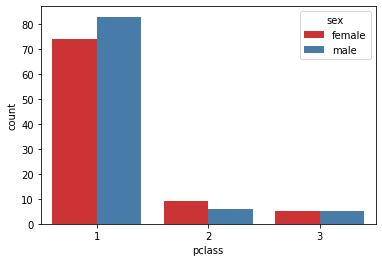

In [49]:
sns.countplot(filtered_df['pclass'],hue = filtered_df['sex'],palette="Set1")

#### 5. Create distplot of age, break-down the plot on categories survived and class using facetgrid.

In [45]:
# sns.countplot(x="pclass", data=filtered_df)

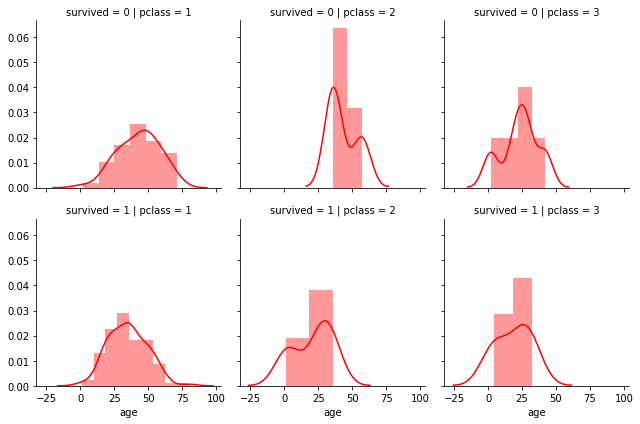

In [55]:
g = sns.FacetGrid(filtered_df,row = 'survived',col = 'pclass')
g.map(sns.distplot, "age",color="r")